# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [10]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [89]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)
np.shape(y)

(70000,)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
#randomly split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, random_state=42)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

In [20]:
print(X_train[0]) #Zeile 0

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  64.  64.
   0.   0. 128. 191. 255. 255. 191.  64.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 191. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 191.   0.   0.   0.   0.   0.   0.
   0. 

In [88]:
#axis=0 Zeilen
from sklearn import preprocessing
X_test_normalized = preprocessing.normalize(X_test, norm='l2', axis=1)
X_train_normalized = preprocessing.normalize(X_train, norm='l2', axis=1)

print(X_train_normalized[0])

ValueError: Expected 2D array, got 1D array instead:
array=[8. 4. 8. ... 3. 8. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

[[0.5280169  0.57601843 0.62401997]
 [0.55072792 0.57695306 0.60317819]
 [0.5591261  0.57716242 0.59519875]]


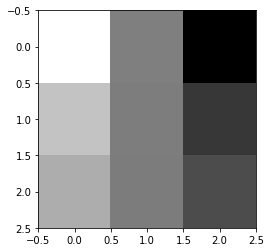

In [56]:
u = np.array([[11,12,13],[21,22,23],[31,32,33]])
u_nor = preprocessing.normalize(u, norm='l2', axis=1)
print(u_nor)
plt.imshow(u_nor, cmap = plt.cm.binary)

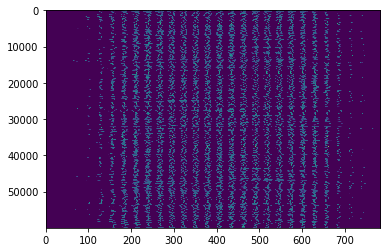

In [42]:
#
#https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
# Wir normalisieren (Interval 0-1) Umeine Konvergenz der Daten zu gewährleistem. Skale information Verschwindet
#Standartisierung: 1. Compare features that have different units or scales. 
# Standartisierung adjusted alle outlier were und macht aus den daten eine mehr normal verteiltung.
#It seems because of the large difference in scales and units, standardizing is a better transformation for this data set.
# Standartisierung Zeigt auch wie viele stdAbweichungen vom Mean die liegen.

# Beispiel NewYORK Auto (y) oder Zug (x) Reisen: 8Mil im Mean(x) und 800k in Mean(y)
# Also benutzen viel mehr den Zug (Touristen und Metropole) und wenige das Auto.
# Also müssen die Daten gescaled werden um Sie miteinander  vergleichen zu können.
# Normalisieren oder Standardisieren oder Divi? 
# Wenn Datensätze statistisch unabhängig sind, dann kann mit einer einfahcen lin. gleichung davon kommen.
# Falls nicht ergibt sich ein Mehrfach gleichung.
# Wenn unterschiedliche Datensätze eine Korrelations zeigen dann ist es auch eine mehrfach gleichung
# Skalar Data Sortierbar reinfolge, Gewicht. 

#Paramerter: imshow(X "The image data. scalar")
#Jede Zeile eine Zahl jede Spalte eine Farbcodierung eines Pixels aus 28*28
plt.imshow(X_train_normalized,interpolation="nearest", aspect="auto")

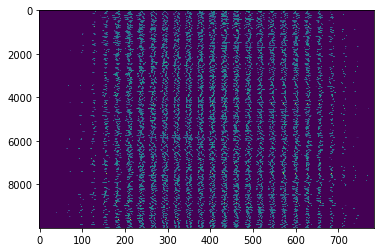

In [40]:
plt.imshow(X_test_normalized,interpolation="nearest", aspect="auto")

4


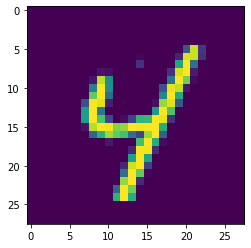

In [82]:
# Zeilte 1 alle spalten
plt.imshow(X_train_normalized[1,:].reshape(28,28))
print(y_train[1]) #Vorhersage zu trainieren. 

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [90]:
# Naive Bayer.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_normalized, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [94]:
# Simple linear model
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Scaling input mean 0 and std 1 for better result.
#The ‘log’ loss gives logistic regression, a probabilistic classifier.
#
clfSGDC = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))

clfSGDC.fit(X_train_normalized, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#Parameter: nEstimators anz. Bäume, max_depth Max tiefe der bäume. Bei 3 habe ich 8 knoten zuviel liber 2.
# random_state=42 kleiner Witz
clfRndF = RandomForestClassifier(max_depth=3, random_state=42)
clfRndF.fit(X_test_normalized,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [108]:
PredCLF = clf.predict(X_test_normalized)
print(PredCLF)
print(y_test)
print(clf.score(X_test_normalized,y_test))
print('--------')
PredclfSGDC = clfSGDC.predict(X_test_normalized)
print(PredclfSGDC)
print(y_test)
print(clfSGDC.score(X_test_normalized, y_test))
print('--------')
PredclfRndF = clfRndF.predict(X_test_normalized)
print(PredclfRndF)
print(y_test)
print(clfRndF.score(X_test_normalized, y_test))

['8' '9' '9' ... '8' '0' '8']
['8' '4' '8' ... '3' '8' '3']
0.5758
--------
['8' '4' '5' ... '3' '3' '3']
['8' '4' '8' ... '3' '8' '3']
0.9085
--------
['8' '9' '9' ... '2' '0' '3']
['8' '4' '8' ... '3' '8' '3']
0.7456


### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
#
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [109]:
#Accuracy, das selbe wie Score.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, PredCLF))
print(accuracy_score(y_test, PredclfSGDC))
print(accuracy_score(y_test, PredclfRndF))

0.5758
0.9085
0.7456


In [110]:
#F-Measure: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 
#The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
#F1 = 2 * (precision * recall) / (precision + recall)
# mit Micro  Calculate metrics globally by counting the total true positives, false negatives and false positives.
from sklearn.metrics import f1_score
print(f1_score(y_test, PredCLF, average= 'macro'))
print(f1_score(y_test, PredclfSGDC,average= 'macro'))
print(f1_score(y_test, PredclfRndF,average= 'macro'))

0.5333773414653749
0.9085322659699655
0.7242233257274224


In [113]:
#ROC Curves: Note: this implementation is restricted to the binary classification task.
#
from sklearn.metrics import roc_curve

fpr_clf, tpr_clf, _ = roc_curve(y_test, PredCLF)
fpr_clfSGDC, tpr_clfSGDC, _ = roc_curve(y_test, PredclfSGDC)
fpr_clfRndF, tpr_clfRndF, _ = roc_curve(y_test, PredclfRndF)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_clf, tpr_clf, label='CLF')
plt.plot(fpr_clfSGDC, tpr_clfSGDC, label='SGDC')
plt.plot(fpr_clfRndF, tpr_clfRndF, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

ValueError: multiclass format is not supported